In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras

## Import dataset

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_test.shape

(10000, 1)

In [6]:
y_train.shape

(50000, 1)

In [7]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
labels = {0: 'airplane',
          1: 'automobile',
          2: 'bird',
          3: 'cat',
          4: 'deer',
          5: 'dog',
          6: 'frog',
          7: 'horse',
          8: 'ship',
          9: 'truck'}


In [9]:
y_train[0]

array([6], dtype=uint8)

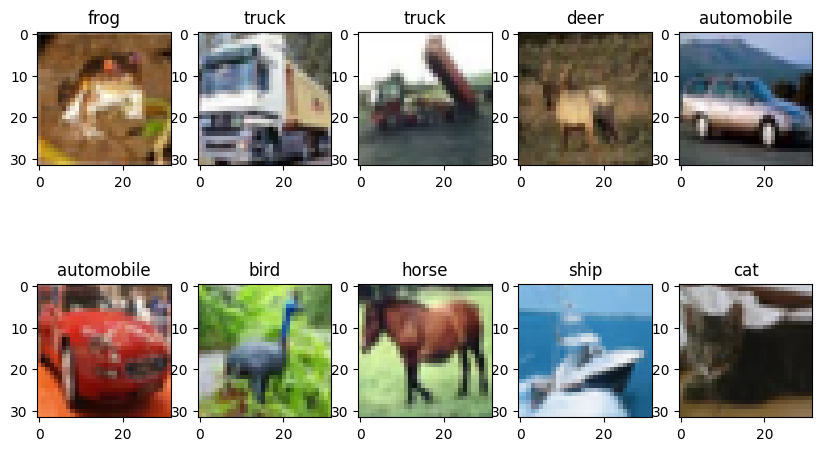

In [10]:
fig, axes = plt.subplots(2,5, figsize=(10,6))

for row in range(2):
    for col in range(5):
        axes[row,col].imshow(x_train[col+row*5])
        axes[row,col].set_title(labels[y_train[col+row*5][0]])


In [11]:
x_train = x_train.reshape(x_train.shape[0], -1)/255.0
x_test = x_test.reshape(x_test.shape[0],-1)/255.0
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [12]:
input_dim = x_train.shape[1]

In [13]:
print(input_dim)

3072


## A simple neural network

In [14]:
from keras.models import Sequential
from keras.layers import Dense

In [15]:
model = Sequential()
model.add(Dense(100,input_dim=input_dim, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
from numpy.random import seed
seed(1)

In [18]:
model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1407/1407 [==============================] - 13s 8ms/step - loss: 1.8978 - accuracy: 0.3093 - val_loss: 1.8356 - val_accuracy: 0.3274
Epoch 2/10
1407/1407 [==============================] - 11s 8ms/step - loss: 1.7097 - accuracy: 0.3867 - val_loss: 1.6427 - val_accuracy: 0.4120
Epoch 3/10
1407/1407 [==============================] - 14s 10ms/step - loss: 1.6268 - accuracy: 0.4166 - val_loss: 1.6744 - val_accuracy: 0.3832
Epoch 4/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.5852 - accuracy: 0.4310 - val_loss: 1.6143 - val_accuracy: 0.4244
Epoch 5/10
1407/1407 [==============================] - 13s 9ms/step - loss: 1.5442 - accuracy: 0.4480 - val_loss: 1.5624 - val_accuracy: 0.4392
Epoch 6/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.5171 - accuracy: 0.4563 - val_loss: 1.5489 - val_accuracy: 0.4472
Epoch 7/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.4909 - accuracy: 0.4671 - val_loss: 1.5541 - val_a

In [19]:
_, test_acc = model.evaluate(x_test,y_test)
print(test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 1.4726 - accuracy: 0.4751
0.47510001063346863


## convolutional neural networks

In [37]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization

In [28]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [29]:
x_train = x_train/255.0
x_test = x_test/255.0
print(y_train)
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
print(x_train.shape)
print(x_test.shape)
print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
(50000, 32, 32, 3)
(10000, 32, 32, 3)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [30]:
x_train.shape

(50000, 32, 32, 3)

In [42]:
model2 = Sequential()
model2.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(128, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(10, activation='softmax'))

In [44]:

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [45]:
model2.fit(x_train,y_train,epochs=20, validation_split=0.1)

Epoch 1/20
1407/1407 [==============================] - 331s 234ms/step - loss: 1.3457 - accuracy: 0.5197 - val_loss: 2.0279 - val_accuracy: 0.3816
Epoch 2/20
1407/1407 [==============================] - 329s 234ms/step - loss: 0.9600 - accuracy: 0.6639 - val_loss: 1.7630 - val_accuracy: 0.5090
Epoch 3/20
1407/1407 [==============================] - 325s 231ms/step - loss: 0.8051 - accuracy: 0.7160 - val_loss: 1.2241 - val_accuracy: 0.6140
Epoch 4/20
1407/1407 [==============================] - 328s 233ms/step - loss: 0.6872 - accuracy: 0.7606 - val_loss: 0.7718 - val_accuracy: 0.7336
Epoch 5/20
1407/1407 [==============================] - 325s 231ms/step - loss: 0.6030 - accuracy: 0.7898 - val_loss: 0.6824 - val_accuracy: 0.7676
Epoch 6/20
1407/1407 [==============================] - 326s 232ms/step - loss: 0.5125 - accuracy: 0.8197 - val_loss: 0.8082 - val_accuracy: 0.7358
Epoch 7/20
1407/1407 [==============================] - 326s 232ms/step - loss: 0.4416 - accuracy: 0.8451 - val_

In [46]:
_, test_acc = model2.evaluate(x_test,y_test)
print(test_acc)

313/313 [==============================] - 24s 76ms/step - loss: 1.1819 - accuracy: 0.7553
0.755299985408783
